In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

In [2]:
%load_ext autoreload
%autoreload 1

In [3]:
%aimport special
%aimport optim
%aimport lossfuncs

## n2

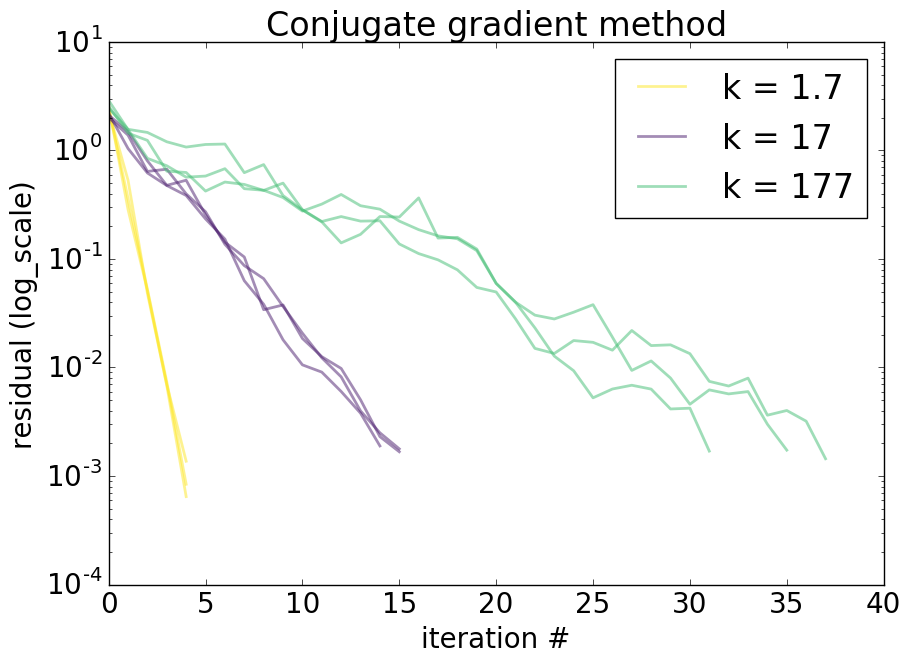

In [4]:
n = 100
matr_num = 3
plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 20})
for k in [1.7, 17, 177]:
    for i in range(matr_num):
        A = special.gen_symm_matr(k, n)
        b = np.random.randn(n)

        ans = optim.cg(lambda x: np.dot(A, x), b, np.zeros(n), trace=True)
        plt.semilogy(ans[2]['norm_r'], label='k = %s' % k if i == 0 else "",
                     c=cm.viridis(k), linewidth=2, alpha=0.5)

plt.title('Conjugate gradient method')
plt.xlabel('iteration #')
plt.ylabel('residual (log_scale)')
plt.legend(loc='best', )
plt.show()

## n4

In [5]:
def logloss(w, X, y, reg_coef):
    A = -y[:, np.newaxis] * X
    return np.logaddexp(0, A.dot(w)).mean() + reg_coef * np.dot(w, w) / 2

In [6]:
n = 100
d = 10
k = 3
w = np.random.rand(k, d)
X = np.random.rand(n, d)
# X[X > 0.1] = 0
y = np.ones(n)
y[np.random.rand(n) > 0.5] = -1

In [7]:
for i in range(k):
    tmp1 = lossfuncs.logistic(w[i], X, y, 1)
    tmp2 = special.grad_finite_diff(lambda x: logloss(x, X, y, 1), w[i])
    print(np.sum(tmp1[1] - tmp2) < 1e-5)

True
True
True


In [8]:
for i in range(k):
    v = np.random.rand() * w[i]
    tmp1 = lossfuncs.logistic_hess_vec(w[i], v, X, y, 1)
    tmp2 = special.hess_vec_finite_diff(lambda x: logloss(x, X, y, 1), w[i], v)
    print(np.sum(tmp1 - tmp2) < 1e-4)

True
True
True
